In [31]:
import seaborn as sns
import pandas as pd

In [32]:
df = pd.read_excel('enhanced_classified_emails_gpt.xlsx')

In [33]:
df.head()

,row_index,topic,subject,original_body,prompt_used,gpt_generated_body,parsed_subject,parsed_body,formality,formality_ratio,topic_confidence,is_just_visual,body_length,word_count
0,0,Empty,Adobe Scan 25 Haz 2024.pdf,Adobe Scan 25 Haz 2024.pdf: https://acrobat.ad...,Skipped because topic is 'Empty'.,NaN,NaN,NaN,Unknown,0.000000,1.000000,False,0,0
1,1,Complaints,Broken showerhead,"Dear janitor, My name is Arda Aydın. I live in...",Write an email similar to the following exampl...,Subject: Issue with Showerhead in Unit 12B\n\n...,Subject: Issue with Showerhead in Unit 12B,"Dear Mr. Patterson,\n\nI hope this message fin...",Formal,2.806518,0.189386,False,788,133
2,2,Empty,NaN,NaN,Skipped because topic is 'Empty'.,NaN,NaN,NaN,Unknown,0.000000,1.000000,False,0,0
3,3,Empty,\n =?utf-8?B?TCdPcsOpYWwgVMO8cmtpeWUgfCBGb3Rvx...,NaN,Skipped because topic is 'Empty'.,NaN,NaN,NaN,Unknown,0.000000,1.000000,False,0,0
4,4,Academic,Meldung 10 and money transfer for enrollment,"Hello dear exchange students team, I would lik...",Write an email similar to the following exampl...,Subject: Meldung 10 Enrollment Fee Transfer\n\...,Subject: Meldung 10 Enrollment Fee Transfer,"Dear Student,\n\nI hope this message finds you...",Formal,18.803555,0.218397,False,1303,215


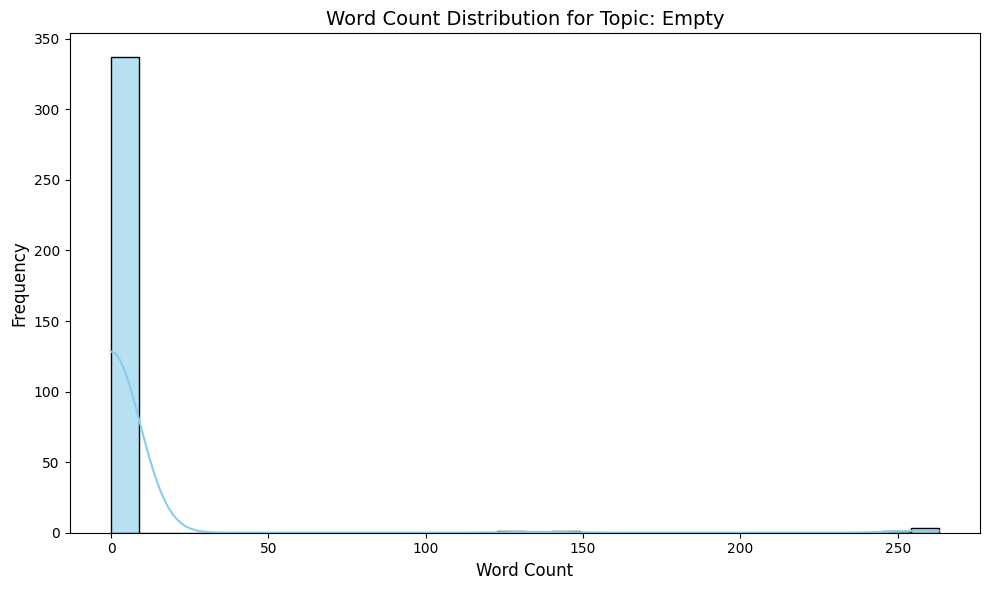

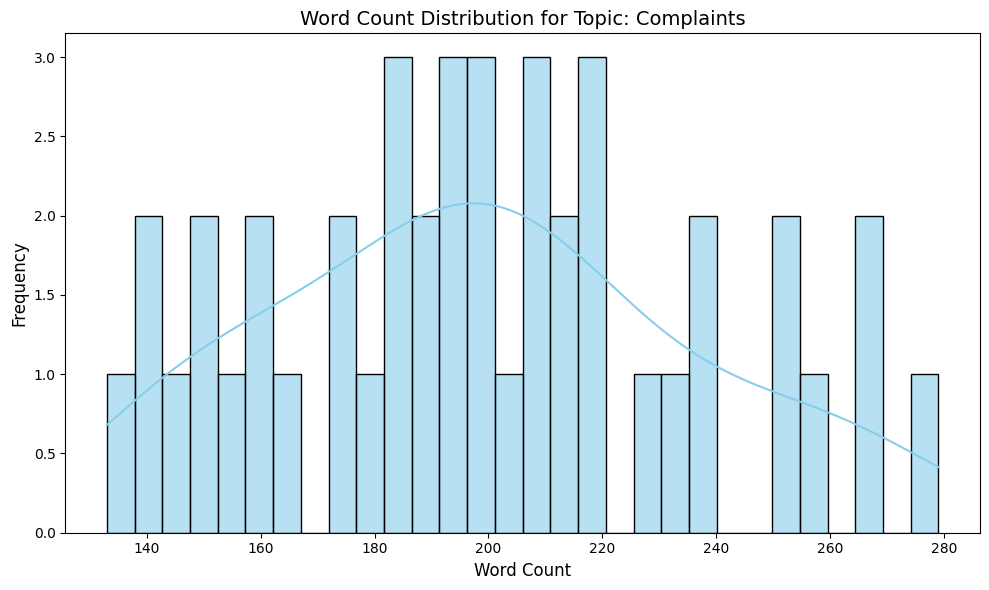

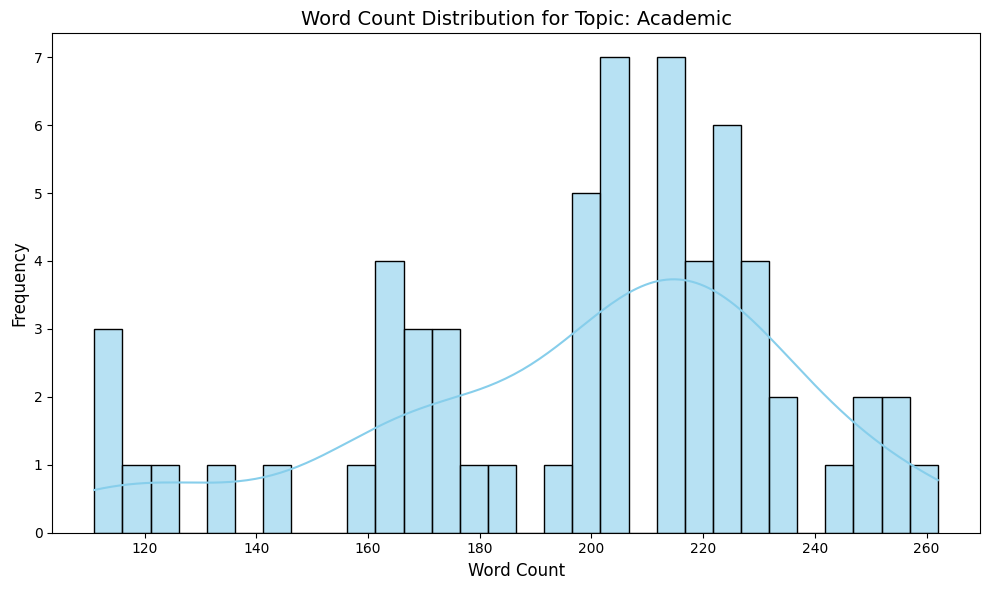

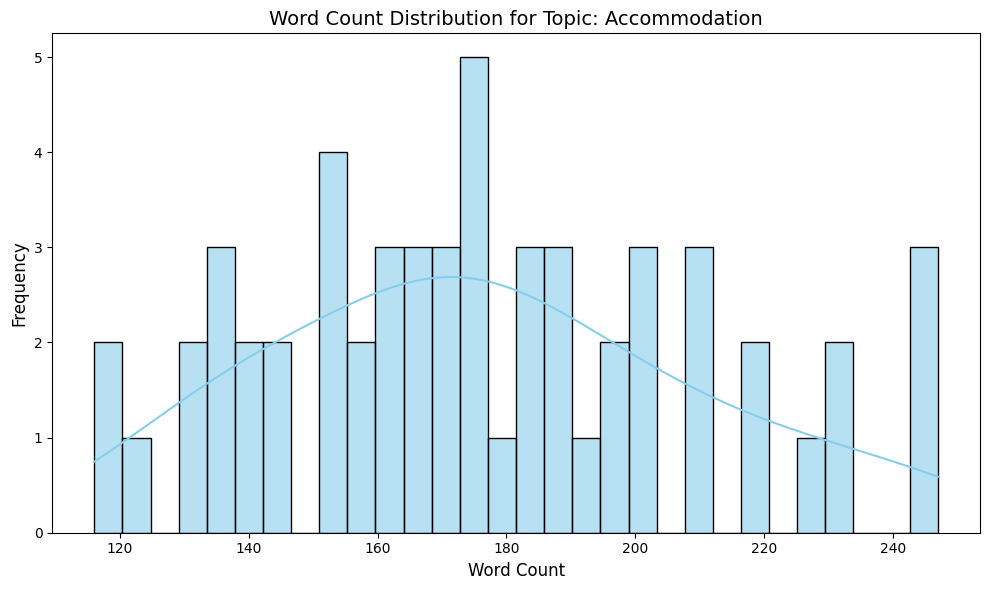

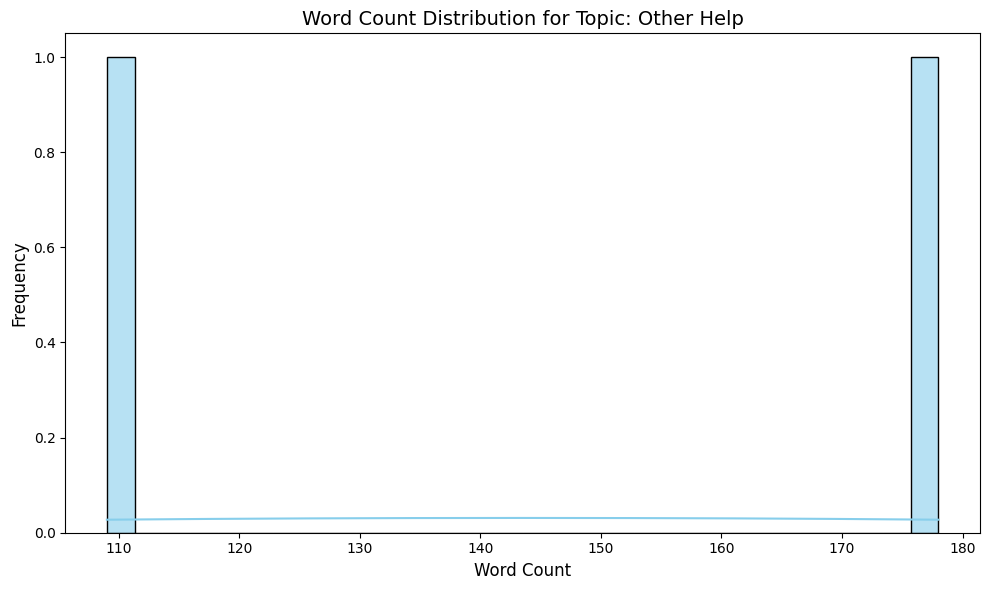

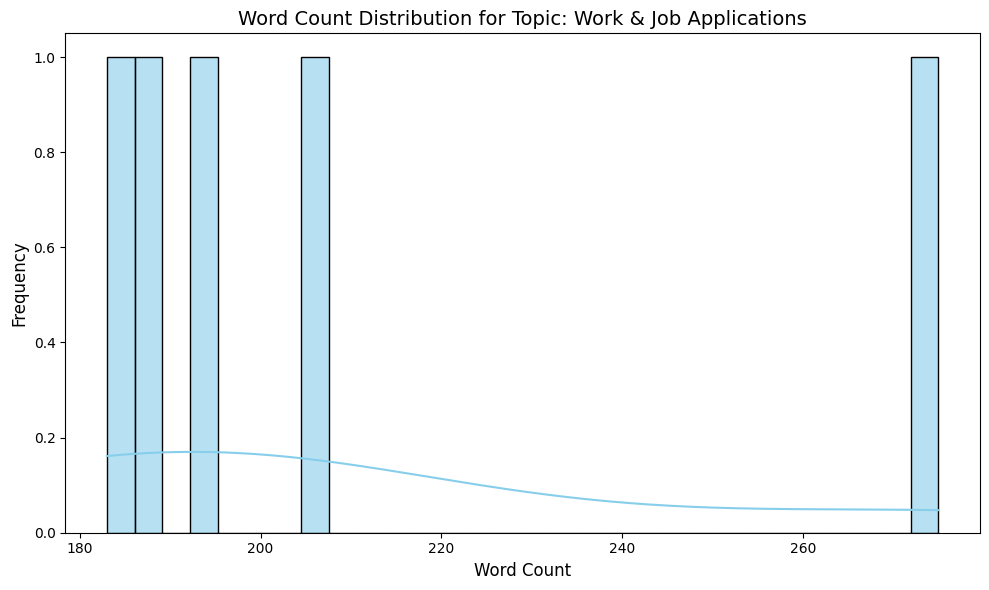

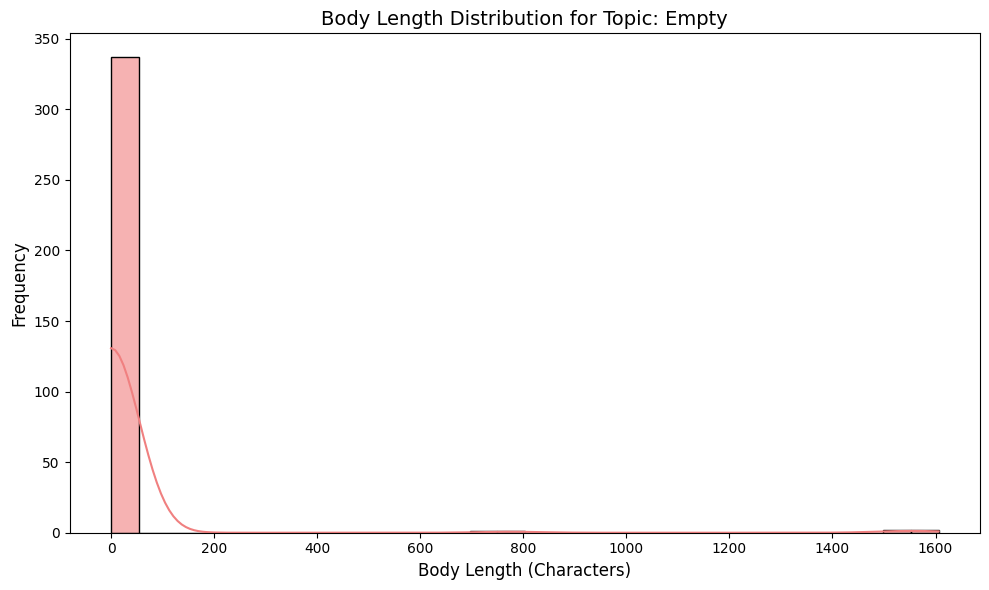

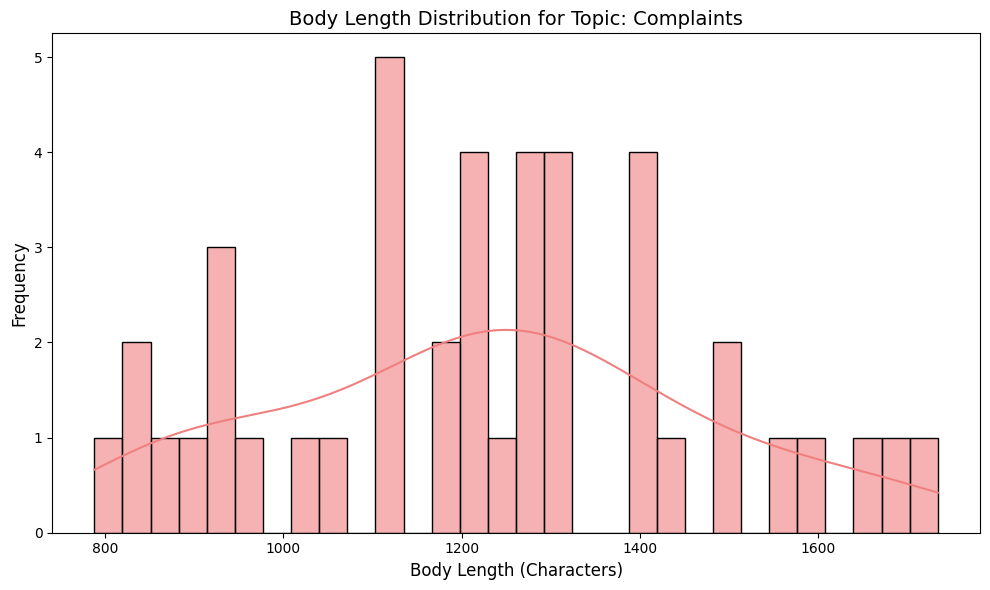

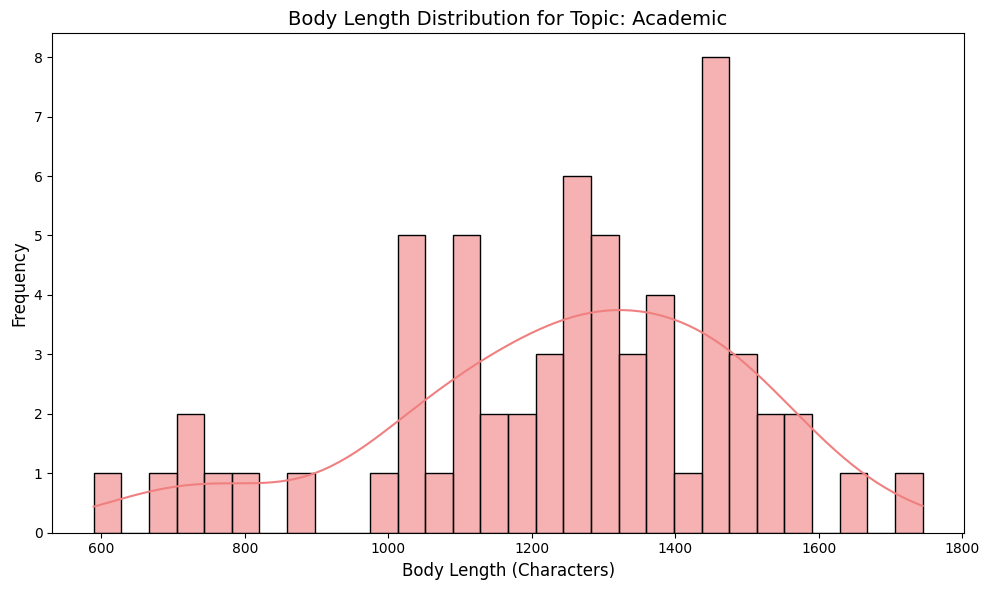

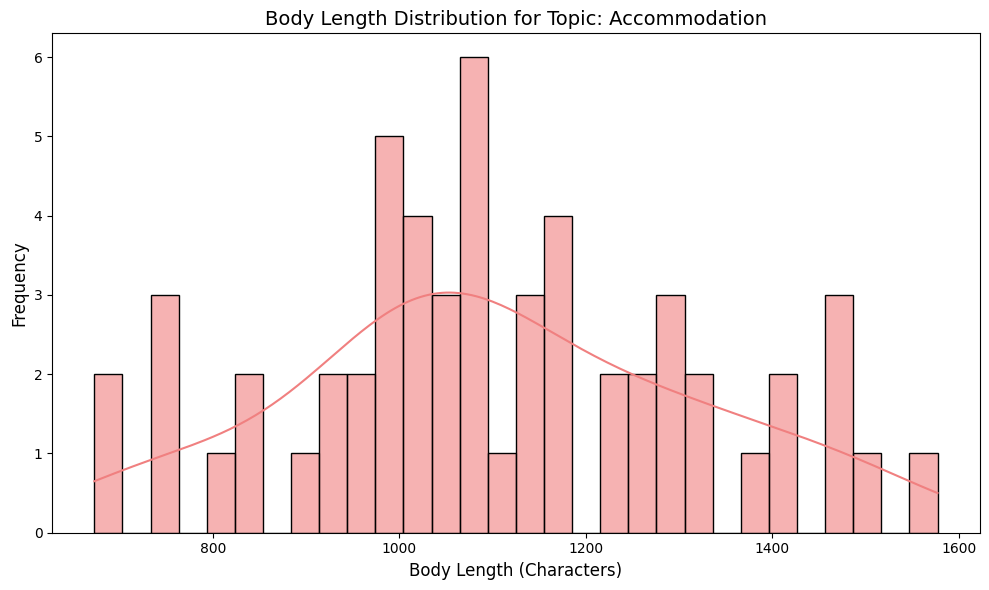

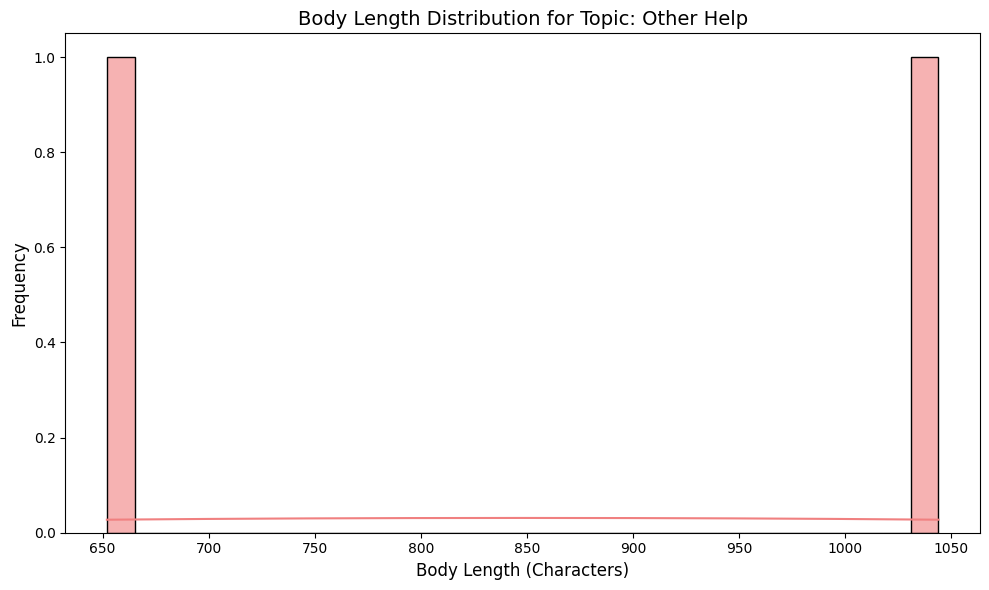

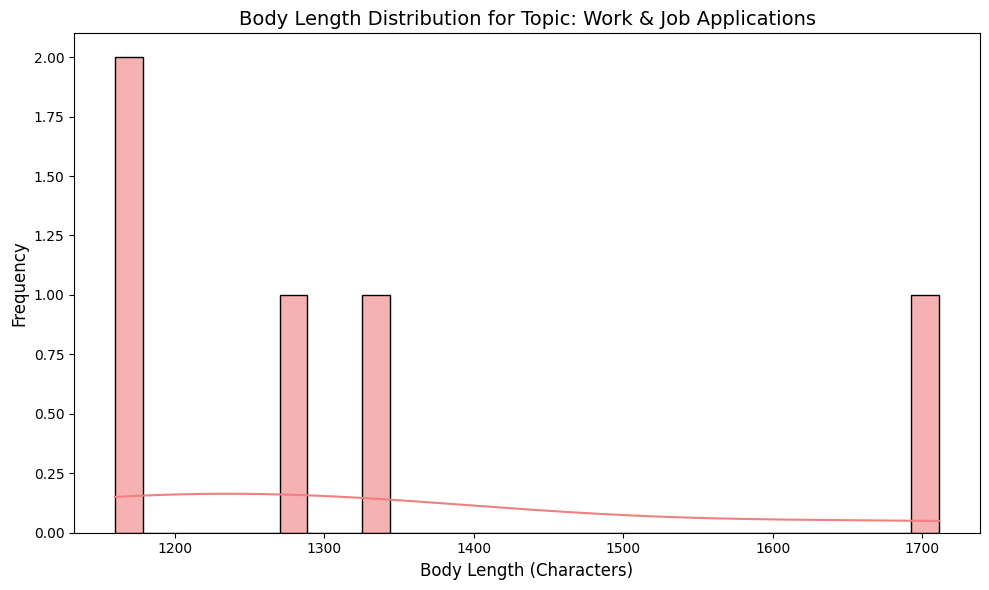

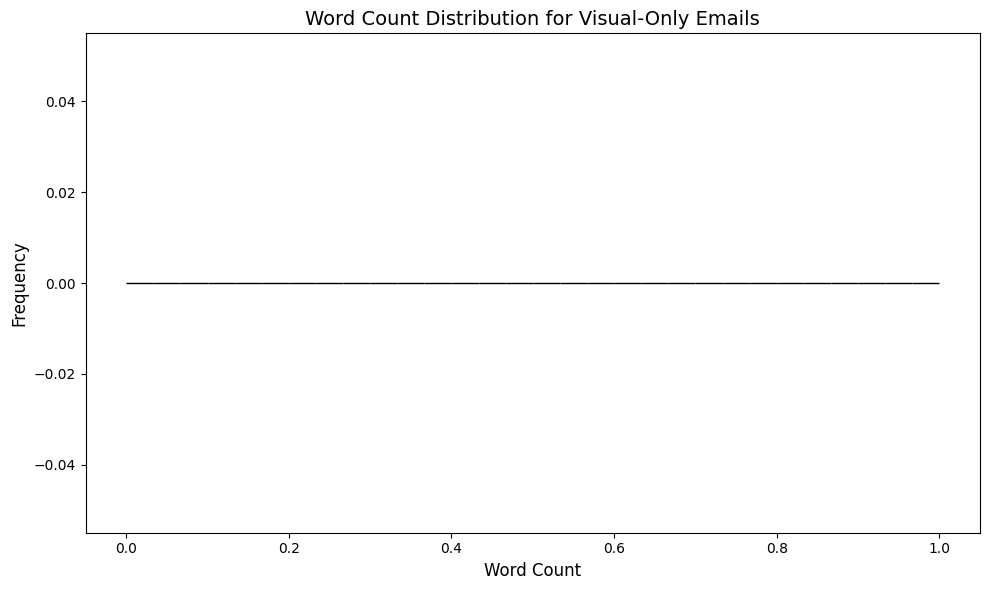

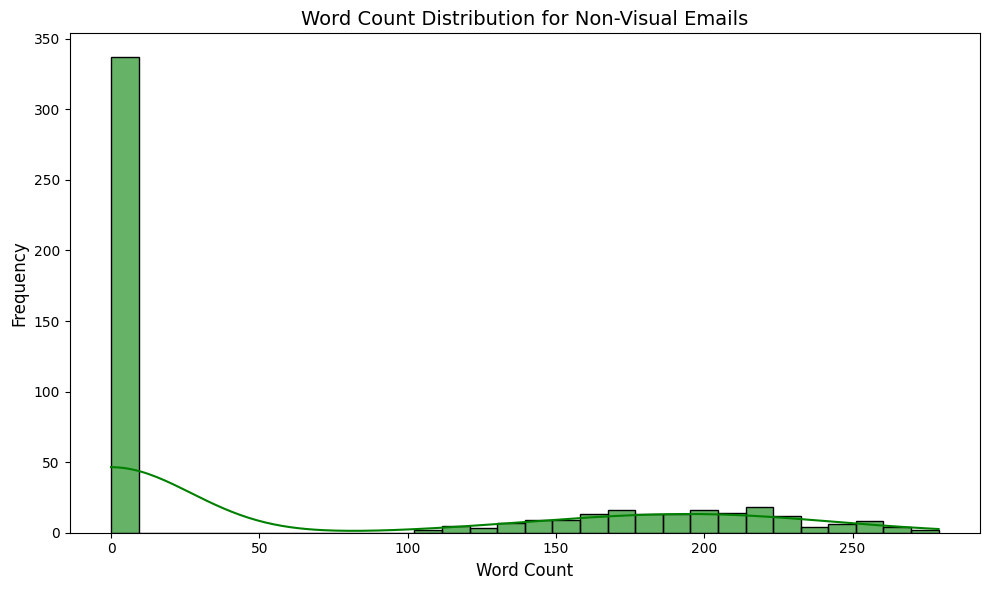

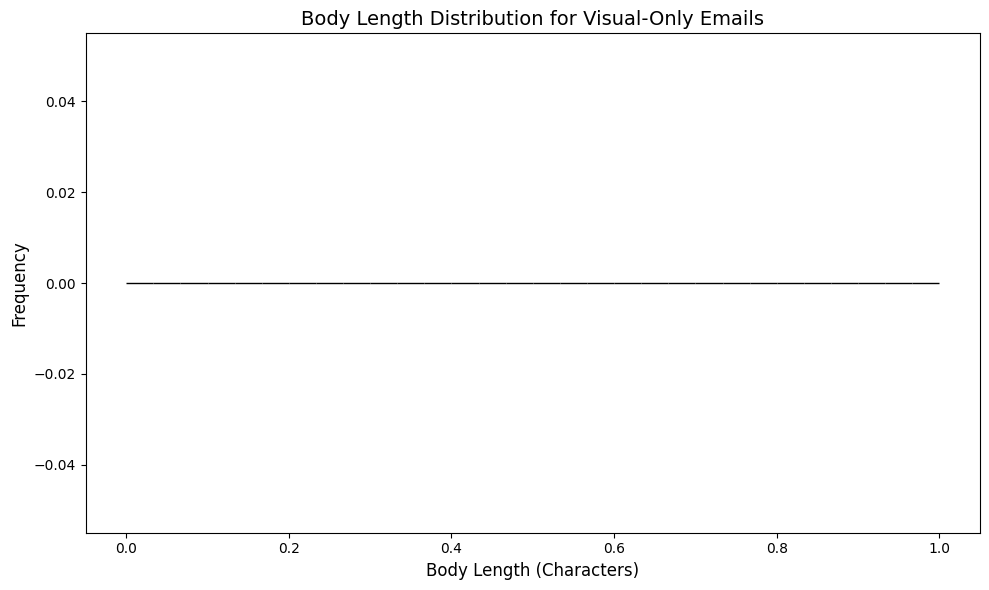

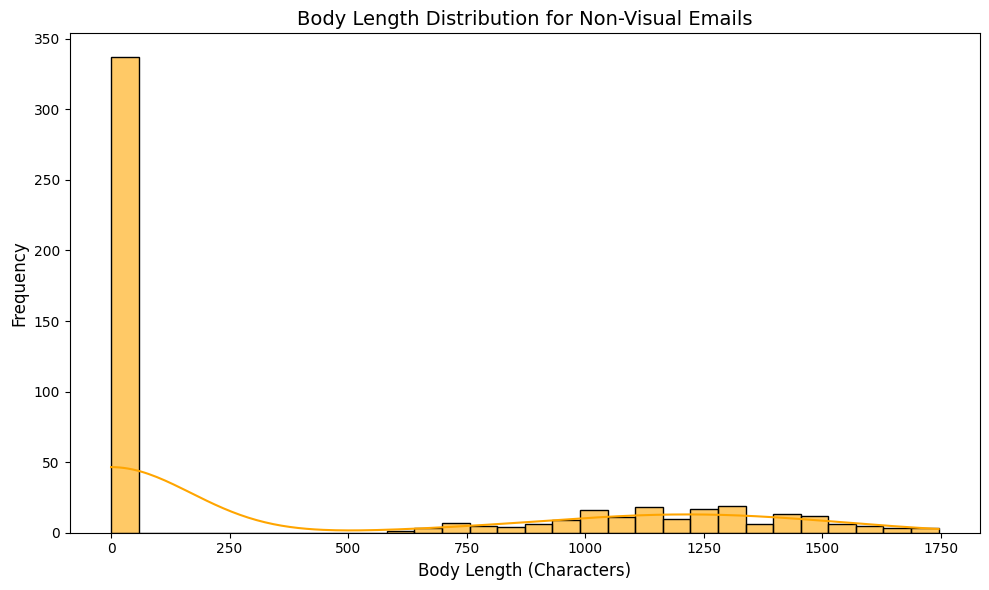

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the directory to save plots
import os
os.makedirs('plots', exist_ok=True)

# Distribution of word count by topic (separate visualizations)
if 'word_count' in df.columns:
    unique_topics = df['topic'].unique()
    for topic in unique_topics:
        plt.figure(figsize=(10, 6))
        sns.histplot(
            data=df[df['topic'] == topic],
            x='word_count',
            kde=True,
            bins=30,
            color='skyblue',
            alpha=0.6
        )
        plt.title(f'Word Count Distribution for Topic: {topic}', fontsize=14)
        plt.xlabel('Word Count', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'GPT plots/word_count_{topic}.png')  # Save the plot
        plt.show()

# Distribution of body length by topic (separate visualizations)
if 'body_length' in df.columns:
    unique_topics = df['topic'].unique()
    for topic in unique_topics:
        plt.figure(figsize=(10, 6))
        sns.histplot(
            data=df[df['topic'] == topic],
            x='body_length',
            kde=True,
            bins=30,
            color='lightcoral',
            alpha=0.6
        )
        plt.title(f'Body Length Distribution for Topic: {topic}', fontsize=14)
        plt.xlabel('Body Length (Characters)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'GPT plots/body_length_{topic}.png')  # Save the plot
        plt.show()

# Distribution of word count for visual-only and non-visual emails
if 'word_count' in df.columns and 'is_just_visual' in df.columns:
    for is_visual in [True, False]:
        plt.figure(figsize=(10, 6))
        subset = df[df['is_just_visual'] == is_visual]
        label = 'Visual-Only Emails' if is_visual else 'Non-Visual Emails'
        sns.histplot(
            data=subset,
            x='word_count',
            kde=True,
            bins=30,
            color='purple' if is_visual else 'green',
            alpha=0.6
        )
        plt.title(f'Word Count Distribution for {label}', fontsize=14)
        plt.xlabel('Word Count', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'GPT plots/word_count_{label.replace(" ", "_")}.png')  # Save the plot
        plt.show()

# Distribution of body length for visual-only and non-visual emails
if 'body_length' in df.columns and 'is_just_visual' in df.columns:
    for is_visual in [True, False]:
        plt.figure(figsize=(10, 6))
        subset = df[df['is_just_visual'] == is_visual]
        label = 'Visual-Only Emails' if is_visual else 'Non-Visual Emails'
        sns.histplot(
            data=subset,
            x='body_length',
            kde=True,
            bins=30,
            color='blue' if is_visual else 'orange',
            alpha=0.6
        )
        plt.title(f'Body Length Distribution for {label}', fontsize=14)
        plt.xlabel('Body Length (Characters)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'GPT plots/body_length_{label.replace(" ", "_")}.png')  # Save the plot
        plt.show()


In [36]:
def mode_or_none(series):
    """Return the first mode if it exists, otherwise None."""
    mode_series = series.mode()
    return mode_series.iloc[0] if not mode_series.empty else None

summary_df = df.groupby('topic').agg(
    avg_word_count=('word_count', 'mean'),
    std_word_count=('word_count', 'std'),
    avg_body_length=('body_length', 'mean'),
    std_body_length=('body_length', 'std'),
    # For day_of_week, let's return the most common (mode).
    # If your day_of_week is numeric, you can also do mean or std.
    avg_formality_ratio=('formality_ratio', 'mean'),
    std_formality_ratio=('formality_ratio', 'std')
).reset_index()

In [37]:
numeric_cols = [
    'avg_word_count', 'std_word_count',
    'avg_body_length', 'std_body_length',
    'avg_formality_ratio', 'std_formality_ratio'
]
summary_df[numeric_cols] = summary_df[numeric_cols].round(2)

In [38]:
summary_df.to_excel("topic_summary_gpt.xlsx", index=False)

print("Summary saved to topic_summary gpt.xlsx")
print(summary_df)

Summary saved to topic_summary gpt.xlsx
                     topic  avg_word_count  std_word_count  avg_body_length  \
0                 Academic          198.48           36.80          1244.56   
1            Accommodation          176.45           33.37          1102.91   
2               Complaints          198.74           37.13          1229.02   
3                    Empty            3.80           29.50            22.65   
4               Other Help          143.50           48.79           848.00   
5  Work & Job Applications          209.00           37.91          1329.60   

   std_body_length  avg_formality_ratio  std_formality_ratio  
0           250.16                26.98                37.47  
1           217.20                 9.70                 9.93  
2           239.85                17.64                33.54  
3           176.90                 0.24                 3.24  
4           277.19                10.02                 4.61  
5           225.02          

In [21]:
# --------------------------------------------------------
# 4. Recalculate your summary stats
# --------------------------------------------------------
# For 'day_of_week', we might take the most common (mode).
def mode_or_none(series):
    mode_series = series.mode()
    return mode_series.iloc[0] if not mode_series.empty else None

# Calculate summary statistics directly
summary_df = df.groupby('topic').agg(
    avg_word_count=('word_count', 'mean'),
    std_word_count=('word_count', 'std'),
    avg_body_length=('body_length', 'mean'),
    std_body_length=('body_length', 'std')
).reset_index()

# Round numeric columns for readability
numeric_stats = ['avg_word_count', 'std_word_count', 'avg_body_length', 'std_body_length']
summary_df[numeric_stats] = summary_df[numeric_stats].round(2)

# Display the summary dataframe
print(summary_df)


AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [22]:
summary_df

,topic,avg_word_count,std_word_count,avg_body_length,std_body_length
0,Academic,198.48,36.80,1244.56,250.16
1,Accommodation,176.45,33.37,1102.91,217.20
2,Complaints,198.74,37.13,1229.02,239.85
3,Empty,3.80,29.50,22.65,176.90
4,Other Help,143.50,48.79,848.00,277.19
5,Work & Job Applications,209.00,37.91,1329.60,225.02
